# Metrics - Class exercise

## Classification

### Confusion Matrix - Build it yourselves

##### Building a model and getting predictions

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [3]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
X = pd.DataFrame(data['data'], columns = data['feature_names'])

y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_train.shape, X_test.shape

((398, 30), (171, 30))

In [5]:
rf_clf = SVC()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

In [6]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [7]:
y_test

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

#### Calculate the TP, FP, FN, TN of the model

False positive:

In [8]:
FP = sum((y_pred==1)&(y_test==0))

False negative

In [9]:
FN = sum((y_pred==0)&(y_test==1))

True positive

In [10]:
TP = sum((y_pred==1)&(y_test==1))

True negative

In [11]:
TN = sum((y_pred==0)&(y_test==0))

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_test, y_pred)

array([[ 54,   8],
       [  1, 108]], dtype=int64)

#### What is the Accuracy of the model?

In [14]:
TN+TP/(n)

NameError: name 'n' is not defined

In [15]:
sum((y_pred==y_test))/len(y_pred)

0.9473684210526315

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9473684210526315

In [17]:
(sum((y_pred==0)&(y_test==0))+sum((y_pred==1)&(y_test==1)))/(len(y_test))

0.9473684210526315

#### What is the recall of the model?

In [18]:
TP/(TP+FN)

0.9908256880733946

In [19]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9908256880733946

In [20]:
TP/sum(y_test)

0.9908256880733946

#### What is the precision of the model?

In [21]:
TP/(FP+TP)

0.9310344827586207

In [22]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9310344827586207

In [23]:
TP/sum(y_pred)

0.9310344827586207

### ROC - Plot it yourself

In [24]:
preds_df = pd.read_csv('ROC_exp_data.csv')

In [25]:
preds_df

,transaction_id,label,prediction_prob
0,1,1,0.8
1,2,0,0.5
2,3,0,0.0
3,4,1,0.3
4,5,0,0.7
5,6,1,0.9
6,7,1,0.6
7,8,0,0.1
8,9,0,0.2
9,10,0,0.4


**Take a paper with a grid and:**

1. Sort the dataset by the "predict proba" descending
2. Look at the label column, and start drawing from the first row to the last - if the label is 1 - draw a line upwards. If the label is 0, draw a line to the right. Do it until you run out of samples.
3. The scales - for the X-axis, the unit is divided by the number of 0s in your label column. for the Y-axis, the unit is divided by the number of 1s in your label column.
4. Try to approximate the AUC with the sum of rectangle squares.

**On this notebook:**
5. Put the data into a python package that can plot the ROC and print the AUC. See if you were right.

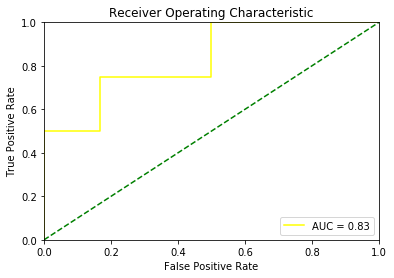

In [31]:
import sklearn.metrics as metrics
preds = preds_df['prediction_prob']
fpr, tpr, threshold = metrics.roc_curve(preds_df['label'], preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'yellow', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Regression

### Calculate metrics on your own

In [39]:
data_boston = load_boston()

In [40]:
print(data_boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [41]:
X = pd.DataFrame(data_boston['data'], columns = data_boston['feature_names'])

y = data_boston['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [42]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

In [43]:
y_pred

array([27.052, 33.507, 31.944, 23.174, 31.303, 19.268, 12.496, 26.098,
       32.248,  9.65 , 20.588, 11.099, 27.133, 20.594, 26.352, 22.928,
       24.175, 10.671, 12.41 , 22.975, 20.391, 23.228, 12.984, 31.067,
       17.71 , 20.427, 23.056, 15.979, 17.254, 15.908, 18.738, 20.898,
       25.472, 22.968, 14.897, 20.706, 48.271, 15.453, 18.73 , 25.939,
       18.248, 18.712, 33.611, 13.102, 18.353, 18.866, 33.75 , 21.372,
       21.271, 19.563, 17.368, 43.146, 10.486,  6.635, 26.467, 31.286,
       43.478, 24.022, 27.131, 32.991,  8.465, 17.692, 26.627, 22.686,
       31.796, 24.002, 46.342, 27.062, 19.007, 19.383, 15.617, 19.084,
       20.947, 27.09 , 19.462, 28.739, 31.659, 21.589, 16.893, 24.047,
       21.178, 21.144, 16.349, 30.123, 22.16 , 19.612, 17.737, 14.566,
       25.439, 20.784, 18.508, 10.983, 16.957,  8.889, 11.378, 31.318,
       16.243, 16.87 , 15.859, 32.071, 22.078, 19.466, 22.195, 13.381,
       21.032, 33.302, 26.156, 22.489, 44.377, 21.188, 22.747,  7.476,
      

In [44]:
y_test

array([23.9, 36.1, 50. , 22.9, 50. , 17.4, 14.6, 24.1, 29. ,  9.7, 24.3,
       13.8, 23.7, 21. , 22. , 22.9, 22.1,  6.3, 15.6, 22.3, 19. , 24.8,
        7. , 37. , 18. , 18.7, 23.2, 11.7, 16.6, 16.1, 19.6, 24. , 23.3,
       24.7, 23.2, 24.4, 50. , 14.1, 27.1, 26.6, 16.8, 18.8, 31.5, 13.8,
       22.5, 18.2, 36.5, 21.2, 22. , 17.5, 19.4, 50. , 10.2,  5. , 28.4,
       29.6, 41.7, 29.8, 23.9, 35.4,  7.4, 14.4, 28.4, 20.6, 34.9, 22.2,
       50. , 28. , 20.4, 23. , 15.6, 18.7, 21.4, 26.5, 17.2, 31.1, 50. ,
       21.4, 18.1, 25.2, 24.3, 20.1, 17.3, 30.5, 19.1, 20.2, 15.2, 17.8,
       23.9, 21.2, 18.9, 11.3, 13.6,  8.5, 13.4, 37.2, 16.7, 10.2, 14.3,
       33.8, 23. , 23.1, 22.8, 17.8, 15.3, 33.2, 25.1, 18.6, 48.3, 14.1,
       22. ,  8.8, 23.7, 29.1, 18.4, 15. , 20.4, 20. , 19.5, 43.8, 13.4,
       17.2, 11.9, 21. , 13.1, 32.5, 29. , 15.1, 23.4, 22.8, 13.8, 27.9,
       21.7, 25. , 14.3, 22.3, 21.7, 25. , 20.4, 24.4, 18.7, 14.4, 10.5,
       10.5, 12.3, 10.9, 16.1, 45.4, 20.2, 26.6, 13

#### What is the MSE of the model?

In [47]:
import numpy as np
np.mean((y_pred-y_test)**2)

14.380736578947353

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

14.380736578947353

#### What is the RMSE of the model?

In [50]:
np.sqrt(np.mean((y_pred-y_test)**2))

3.7921941641940426

In [51]:
mean_squared_error(y_test, y_pred, squared=False)

3.7921941641940426

#### what is the $R^2$ of the model?

In [53]:
y_test.var()

90.35223640927978

In [57]:
1-(mean_squared_error(y_test, y_pred)/(y_test.var()))

0.8408369604289025

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8408369604289025

## Ranked Based Spearman Corellation

In [58]:
df = pd.DataFrame()
df['Distance_from_times_square'] = [500, 120, 30, 96, 305, 103, 201, 94, 75, 54]
df['Food_price_$'] = [61, 76, 98, 125, 55, 94, 74, 110, 66, 80]

In [59]:
df

,Distance_from_times_square,Food_price_$
0,500,61
1,120,76
2,30,98
3,96,125
4,305,55
5,103,94
6,201,74
7,94,110
8,75,66
9,54,80


C:\Users\Danielle\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


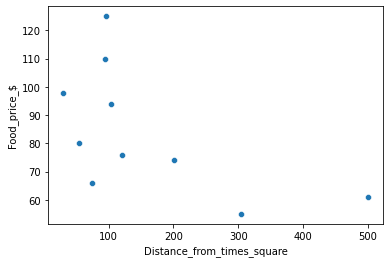

In [60]:
sns.scatterplot(df['Distance_from_times_square'], df['Food_price_$']);

In [63]:
df_ranked = df.rank()

In [64]:
df_ranked

,Distance_from_times_square,Food_price_$
0,10.0,2.0
1,7.0,5.0
2,1.0,8.0
3,5.0,10.0
4,9.0,1.0
5,6.0,7.0
6,8.0,4.0
7,4.0,9.0
8,3.0,3.0
9,2.0,6.0


In [70]:
d2

0    64.0
1     4.0
2    49.0
3    25.0
4    64.0
5     1.0
6    16.0
7    25.0
8     0.0
9    16.0
dtype: float64

In [65]:
d2 = (df_ranked['Distance_from_times_square']-df_ranked['Food_price_$'])**2

In [67]:
n = len(df_ranked)

In [69]:
1-((6*sum(d2))/(n*(n**2-1)))

-0.6000000000000001

In [72]:
df_ranked.corr()

,Distance_from_times_square,Food_price_$
Distance_from_times_square,1.0,-0.6
Food_price_$,-0.6,1.0


In [71]:
df.corr(method='spearman')

,Distance_from_times_square,Food_price_$
Distance_from_times_square,1.0,-0.6
Food_price_$,-0.6,1.0


#### Manually calculate the Spearman Corellation between the two variables. Compare your results to those a function yields

In [ ]:
# your code here